# SWE546_Assignment4
<br>
<br>
<b>MovieLens Recommendation System</b>

http://grouplens.org/datasets/movielens/

Using the MovieLens 1M dataset, and using only the rankings, implement a recommendation sytem using SGD.

<ul style="list-style-type:square">
  <li>The output of your program must be the highest estimated rankings for the first 10 movies of the first 20 users</li>
  <li>Modify the program for mini batch and classical gradient descent</li>
  <li>Compare the running times and solution quality as a function of the batch size</li>    
  <li>Submit a short report with the plots of your results</li>
</ul>

<br>
<ol>
      <li>SGD is when batchsize = 1,</li>
      <li>Gradient descent is batchsize = Number of observed entries in the matrix.</li>
    </ol> 

<blockquote>
import pandas as pd
<br>
rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] 
<br>
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames)
</blockquote>

<h3>SGD is when batchsize = 1</h3>

In [80]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#set column names
rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] 

#get data and display first 3 of them
rating = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')
rating[0:3]


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [81]:
ratings = np.mat(rating) #Ys

ratingCount=rating.shape[0]  #Ysize
userCount=np.max(ratings[:,0]) +1 #Nr
movieCount=np.max(ratings[:,1]) +1 #Nc

print(' User Count: ', userCount, '\n Movie Count: ', movieCount, '\n Rating Count: ', ratingCount)


 User Count:  6041 
 Movie Count:  3953 
 Rating Count:  1000209


In [35]:
print(ratings)
#Shuffle Ratings
np.random.shuffle(ratings)
print(ratings)

[[        1      1193         5 978300760]
 [        1       661         3 978302109]
 [        1       914         3 978301968]
 ..., 
 [     6040       562         5 956704746]
 [     6040      1096         4 956715648]
 [     6040      1097         4 956715569]]
[[     2541      1453         4 974048043]
 [      121      3253         5 977458171]
 [     5955       377         2 957108741]
 ..., 
 [     1837      1357         4 974838584]
 [     5135      2100         4 962089763]
 [     4088      3055         5 965429610]]


In [82]:

# Create A, B matrices by using user and movie count 
A = np.mat(np.random.rand(userCount, 1))
B = np.mat(np.random.rand(1, movieCount))

#Create M and Y matrices (zero matrices) by using user and movie zero matrices
M = np.zeros((userCount, movieCount))
Y = np.zeros((userCount, movieCount))
print(M)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [83]:
for i in range(ratingCount):
    
    # Create the Mask matrix: M[user, movie]
    M[ratings[i,0], ratings[i,1]] = 1
    
    # Create the Y matrix with the original values from the ratings table
    Y[ratings[i,0] , ratings[i,1]] = ratings[i, 2]
    
print(Y)
print(M)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  3.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


In [84]:
# Create Eta, EPOCH 
EPOCH = 5
Eta = 0.1
eta = Eta

In [88]:
#holds total error
errors=[]
iterationCount= list(range(EPOCH))

for i in range(EPOCH):
    # average error
    E = np.multiply(M, np.subtract(Y, A*B))
    Err = np.sum(np.square(E)) / np.sum(M)
    
     # add to array
    errors.append(Err)
    
    for k in range(10000):
        u = ratings[k,0]
        m = ratings[k,1]
        
        # find error for each point
        err = ratings[k,2] - (A[u,:] * B[:,m])

        
       
        temp_A = A[u,:] + (eta * err[0,0] * B[:,m].T)
        B[:,m]   = B[:,m] + (eta * err[0,0] * A[u,:].T)
        A[u,:]   = temp_A
    
    eta = Eta*1./(i+1)
    
print(errors)  

[10.108472975302291, 9.823132522511596, 9.6960288011803559, 9.6352144703695135, 9.6142401877807071]


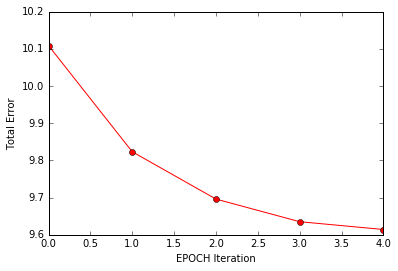

In [89]:
#display errors
plt.plot(iterationCount, errors, 'ro-')
plt.xlabel("EPOCH Iteration")
plt.ylabel("Total Error")
plt.show()



In [99]:
compoundData = A * B
compoundData

matrix([[  6.94330494e-03,   1.21295173e+00,   1.10882997e+00, ...,
           3.47763502e-01,   5.75549884e-01,   1.18427825e+00],
        [  2.59304482e-02,   4.52988630e+00,   4.14103347e+00, ...,
           1.29875665e+00,   2.14944707e+00,   4.42280240e+00],
        [  2.43198188e-02,   4.24851946e+00,   3.88381962e+00, ...,
           1.21808641e+00,   2.01593751e+00,   4.14808691e+00],
        ..., 
        [  3.02461374e-03,   5.28381008e-01,   4.83023920e-01, ...,
           1.51491297e-01,   2.50718657e-01,   5.15890385e-01],
        [  4.62869697e-03,   8.08604263e-01,   7.39192354e-01, ...,
           2.31833670e-01,   3.83685582e-01,   7.89489325e-01],
        [  1.37109063e-03,   2.39520914e-01,   2.18960048e-01, ...,
           6.86726685e-02,   1.13653521e-01,   2.33858777e-01]])

In [108]:
# Print data 10 movies of first 20 user
for j in range(20):
    
    userData = [(0,0)]
    
    for m in range (movieCount):
        movieData = (compoundData[j, m], m)
        userData.append(movieData)
        
    userData = sorted(userData, key=lambda tup: tup[0], reverse=True)     
    
    print("\nMovies for User =" , j+1 , " as follows: \n")
    
    for n in range(10):
        print (n+1, "\t", userData[n])


Movies for User = 1  as follows: 

1 	 (1.6406677440452238, 3163)
2 	 (1.6239298636933153, 1192)
3 	 (1.6070269013860397, 824)
4 	 (1.5947707140140437, 771)
5 	 (1.5731702346189802, 499)
6 	 (1.5702787785801626, 3360)
7 	 (1.5641932267861791, 3943)
8 	 (1.5203450627643997, 2920)
9 	 (1.5079993432717915, 1176)
10 	 (1.506682976512153, 2917)

Movies for User = 2  as follows: 

1 	 (6.1272334049706849, 3163)
2 	 (6.0647241614063834, 1192)
3 	 (6.0015984032094547, 824)
4 	 (5.9558264783600539, 771)
5 	 (5.8751573853074355, 499)
6 	 (5.8643589612545766, 3360)
7 	 (5.8416318756669492, 3943)
8 	 (5.6778766386203223, 2920)
9 	 (5.6317703473507716, 1176)
10 	 (5.6268542475419441, 2917)

Movies for User = 3  as follows: 

1 	 (5.7466498377913702, 3163)
2 	 (5.6880232586083679, 1192)
3 	 (5.6288184586396657, 824)
4 	 (5.5858895856677595, 771)
5 	 (5.5102311277853593, 499)
6 	 (5.5001034310370329, 3360)
7 	 (5.4787880030006768, 3943)
8 	 (5.3252041676520721, 2920)
9 	 (5.2819616969098311, 1176)
1